In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import ipynb.fs.full.jsonReader as jr
import ipynb.fs.full.functions as fn
import ipynb.fs.full.movingAvgFilter as maf

[10.350035026736142, 10.342794628034852, 10.334293693446508, 10.3194900794229, 10.298383785964026, 10.270974813069888, 10.237263160740486, 10.19724882897582, 10.150931817775888, 10.098312127140693, 10.039389757070234, 9.974164707564508, 9.903897514510572, 9.83675163782599, 9.777409052064801, 9.725869757227, 9.682133753312591, 9.646201040321571, 9.618071618253941, 9.5977454871097, 9.585222646888848, 9.58050309759139, 9.583586839217318, 9.591352555397282, 9.597269602812691, 9.600105535620507, 9.599860353820734, 9.596534057413368, 9.590126646398414, 9.580638120775866, 9.568068480545728, 9.552417725707997, 9.533685856262675, 9.511872872209764, 9.488827442313816, 9.462345934005508, 9.431569327681752, 9.396497623342544, 9.357130820987887, 9.313468920617783, 9.265511922232227, 9.213259825831223, 9.156712631414768, 9.095870338982866, 9.030732948535512, 8.96473653848507, 8.897424929606471, 8.828798121899716, 8.758856115364804, 8.687598910001736, 8.61502650581051, 8.541138902791129, 8.4659361009

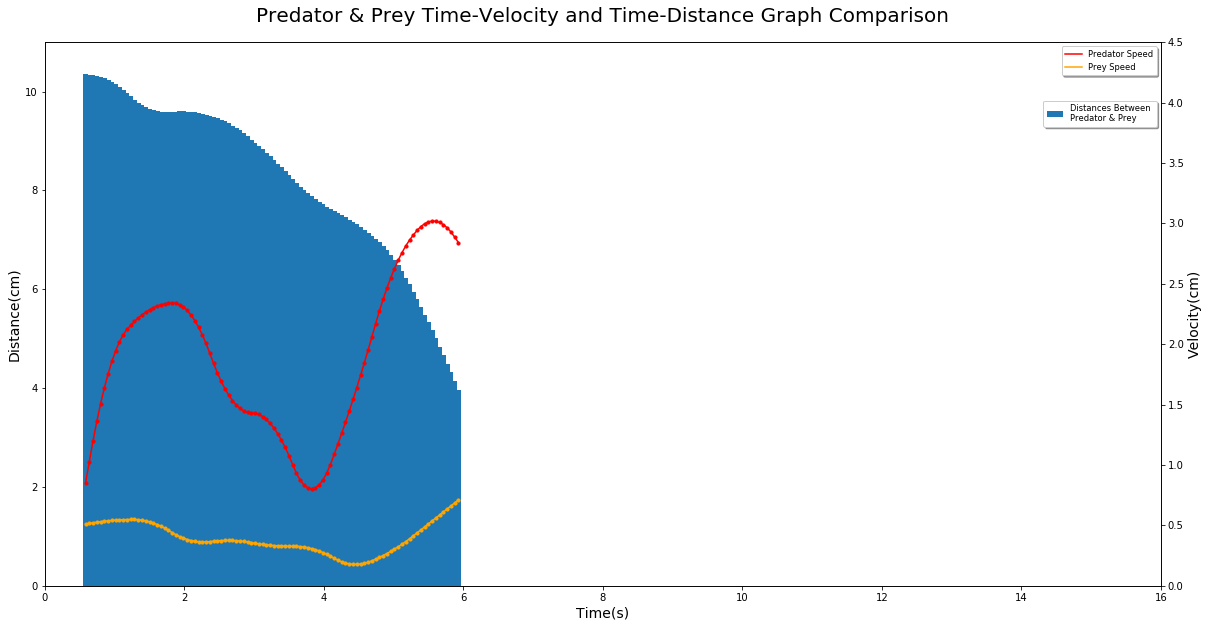

In [2]:
videoLength = 7
timeSpliter = len(jr.myJSONS)/videoLength
time = 1/timeSpliter

#print(len(jr.myJSONS))
#print(time)

pdr_points = jr.pdr_points
pr_points = jr.pr_points

pdr_x = [fn.pixelToCm(pdr_points[x][0],96) for x in range(len(pdr_points))]      #getting a seperate list for predator X co-ordination for center point
pdr_y = [fn.pixelToCm(pdr_points[y][1],96) for y in range(len(pdr_points))]      #getting a seperate list for predator Y co-ordination for center point

pr_x = [fn.pixelToCm(pr_points[x][0],96) for x in range(len(pr_points))]         #getting a seperate list for prey X co-ordination for center point
pr_y = [fn.pixelToCm(pr_points[y][1],96) for y in range(len(pr_points))]         #getting a seperate list for prey Y co-ordination for center point

distances_pdr = fn.distance(pdr_x,pdr_y)
distances_pr = fn.distance(pr_x,pr_y)

velocities_pdr = fn.velocity(distances_pdr, time)
#print(velocities_pdr)
velocities_pr = fn.velocity(distances_pr, time)
distance_between_object = fn.distance_between_objects(pdr_x,pdr_y,pr_x,pr_y)



T = [(i+1)/timeSpliter for i in range(len(velocities_pdr))]
#print(T)

f_pdr = interp1d(T,velocities_pdr,kind='linear',fill_value="extrapolate")
f_pr = interp1d(T,velocities_pr,kind='linear',fill_value="extrapolate")
f_distance = interp1d(T,distance_between_object,kind='linear',fill_value="extrapolate")
newT_pdr =  np.linspace(T[0],T[-1],num=109,endpoint=True)
newT_pr =  np.linspace(T[0],T[-1],num=109,endpoint=True)
#print(list(f_pdr(newT_pdr)))
#print(list(newT_pdr))

without_nans_pdr = maf.filter(f_pdr(newT_pdr),10)
without_nans_pr = maf.filter(f_pr(newT_pr),10)
without_nans_distance = maf.filter(f_distance(newT_pdr),10)
##
newT_pdrT = newT_pdr[:len(without_nans_pdr)]
newT_prT = newT_pr[:len(without_nans_pr)]
print(without_nans_distance)

##plt.
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(newT_pdrT,without_nans_distance, label = 'Distances Between \nPredator & Prey', width = 0.07)
ax2.plot(newT_pdrT,without_nans_pdr, color = 'red', label = 'Predator Speed')
ax2.plot(newT_prT,without_nans_pr, color = 'orange', label = 'Prey Speed')
ax2.scatter(newT_pdrT,without_nans_pdr, s=10, marker='o', color = 'red')
ax2.scatter(newT_prT,without_nans_pr, s=10, marker='o', color = 'orange')
ax1.set_xlabel('Time(s)', fontsize = 14)
ax1.set_ylabel('Distance(cm)', fontsize = 14)
ax2.set_ylabel('Velocity(cm)', fontsize = 14)
plt.title('Predator & Prey Time-Velocity and Time-Distance Graph Comparison', fontsize = 20, pad = 20)
ax1.set_xlim([0,16])
ax1.set_ylim([0,11])
ax2.set_ylim([0,4.5])
ax1.legend(fancybox=True, fontsize = 'small', bbox_to_anchor=(0.5, 0.5, 0.5, 0.4), shadow = True, loc = 'upper right')
ax2.legend(fancybox=True, fontsize = 'small', shadow = True, bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), loc = 'upper right')
plt.show()

In [3]:
print(len(newT_pdrT))

100


In [4]:
len(without_nans_pdr)

100